In [1]:
import pandas as pd

s2_df = pd.read_excel('data/jayavulu/Supplementary_Table2.xlsx')
s2_df

,peakid,chr,start,end,anno,log2FC,P-val,adj.P-val,repressor_status,MPRA_validated_silencer
0,peak1,chr1,1023600,1023800,tested_uncharacterized_CREs,NaN,NaN,NaN,known_repressor,NaN
1,peak2,chr1,1041915,1042115,tested_uncharacterized_CREs,0.038015,0.693495,1.000000,known_repressor,NO
2,peak3,chr1,1042655,1042855,tested_uncharacterized_CREs,0.437538,1.000000,1.000000,known_repressor,NO
3,peak4,chr1,1060475,1060675,tested_uncharacterized_CREs,-0.079254,0.141751,0.284525,known_repressor,NO
4,peak5,chr1,1127175,1127375,tested_uncharacterized_CREs,-0.237514,0.001488,0.004564,known_repressor,YES
...,...,...,...,...,...,...,...,...,...,...
7542,peak7489,chrX,74417295,74417495,control_random_regions,NaN,NaN,NaN,control_element,NaN
7543,new_peak95,chrX,78217716,78217966,control_random_regions,NaN,NaN,NaN,control_element,NaN
7544,new_peak96,chrX,97876902,97877152,control_random_regions,NaN,NaN,NaN,control_element,NaN
7545,new_peak97,chrX,111138095,111138345,control_random_regions,NaN,NaN,NaN,control_element,NaN


In [18]:
s2_df = s2_df.sort_values('log2FC').dropna(subset=['log2FC'])
s2_df = s2_df[s2_df['anno']=='tested_uncharacterized_CREs']
s2_df

,peakid,chr,start,end,anno,log2FC,P-val,adj.P-val,repressor_status,MPRA_validated_silencer,dummy
3336,peak3337,chr19,8631775,8631975,tested_uncharacterized_CREs,-8.619535,8.083598e-53,9.069733e-50,known_repressor,YES,0
370,peak371,chr1,113408175,113408375,tested_uncharacterized_CREs,-8.556838,8.220468e-53,9.069733e-50,known_repressor,YES,0
4086,peak4087,chr2,234276376,234276576,tested_uncharacterized_CREs,-8.453036,8.458711e-53,9.069733e-50,no_known_repressor,YES,0
2883,peak2884,chr17,47401936,47402136,tested_uncharacterized_CREs,-8.111884,9.451333e-53,9.069733e-50,no_known_repressor,YES,0
2850,peak2851,chr17,41121376,41121576,tested_uncharacterized_CREs,-8.086608,9.524018e-53,9.069733e-50,no_known_repressor,YES,0
...,...,...,...,...,...,...,...,...,...,...,...
921,peak922,chr10,32837196,32837396,tested_uncharacterized_CREs,2.057311,1.000000e+00,1.000000e+00,no_known_repressor,NO,0
6876,peak6877,chr7,157726195,157726395,tested_uncharacterized_CREs,2.093301,1.000000e+00,1.000000e+00,known_repressor,NO,0
6156,peak6157,chr6,140075755,140075955,tested_uncharacterized_CREs,2.093681,9.999999e-01,1.000000e+00,known_repressor,NO,0
1170,peak1171,chr11,3319156,3319356,tested_uncharacterized_CREs,2.159843,1.000000e+00,1.000000e+00,no_known_repressor,NO,0


In [12]:
s2_df.MPRA_validated_silencer.value_counts()

NO     4231
YES    3001
Name: MPRA_validated_silencer, dtype: int64

<AxesSubplot:xlabel='MPRA_validated_silencer'>

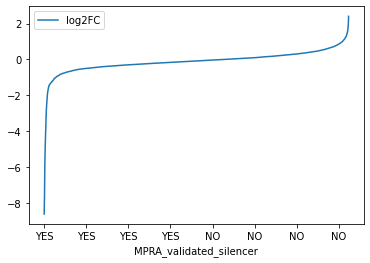

In [17]:
s2_df.plot(x='MPRA_validated_silencer',y=['log2FC'])

In [19]:
top=s2_df[:2000]
bottom=s2_df[-2000:]

<AxesSubplot:>

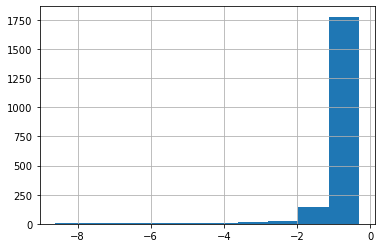

In [24]:
top.log2FC.hist()

<AxesSubplot:>

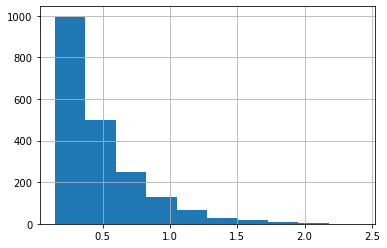

In [25]:
bottom.log2FC.hist()

<AxesSubplot:>

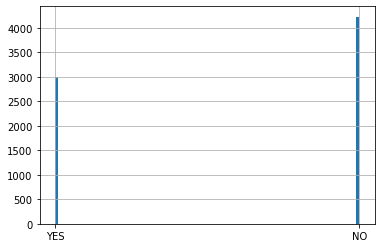

In [8]:
s2_df.MPRA_validated_silencer.hist(bins=100)

We chose the top 2000 uncharacterized CREs sequences with the lowest MPRA activity as a positive set, and the bottom 2000 uncharacterized CREs with highest MPRA activity as a negative set...

In [51]:
s2_df['y']

<AxesSubplot:>

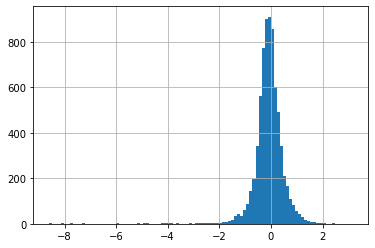

In [32]:
s2_df.log2FC.hist(bins=100)

***We collected the uncharacterized cis-regulatory elements (CREs) in K562 cells with MPRA provided by Jayavelu et al. Then we chose the top 2000 uncharacterized CREs sequences with the lowest MPRA activity as a positive set, and the bottom 2000 uncharacterized CREs with highest MPRA activity as a negative set.***

In [52]:
encode_hg19_df = pd.read_csv('data/jayavulu/Candidate_silencers_and_uncharacterized_CREs_human_hg19_ENCODE_cell_types.txt',sep='\t')
encode_hg19_df

,chr,start,end,peakid,cell_type,uniq_id,SVM_prediction
0,chr1,54375,54525,peak1,ENCU40,id1,Candidate_Silencer
1,chr1,54375,54525,peak1,ENCU53,id2,Candidate_Silencer
2,chr1,66275,66485,peak1,ENCU12,id5,uncharacterized_CRE
3,chr1,66335,66505,peak1,ENCU26,id6,uncharacterized_CRE
4,chr1,66355,66505,peak1,ENCU13,id7,Candidate_Silencer
...,...,...,...,...,...,...,...
2040019,chrY,28683355,28683505,peak810657,ENCU13,id3470182,uncharacterized_CRE
2040020,chrY,28721635,28721925,peak12267,ENCU50,id3470184,uncharacterized_CRE
2040021,chrY,28721695,28721845,peak232836,ENCU47,id3470186,uncharacterized_CRE
2040022,chrY,28734715,28734925,peak810658,ENCU13,id3470190,Candidate_Silencer


In [53]:
roadmap_hg19_df = pd.read_csv('data/jayavulu/Candidate_silencers_and_uncharacterized_CREs_human_hg19_roadmap_cell_types.txt',sep='\t')
roadmap_hg19_df

,chr,start,end,peakid,cell_type,uniq_id,SVM_prediction
0,chr1,928776,928917,peak1,E003,id1,uncharacterized_CRE
1,chr1,1153909,1154050,peak2,E003,id2,uncharacterized_CRE
2,chr1,1180000,1180068,peak3,E003,id3,uncharacterized_CRE
3,chr1,1218670,1218747,peak4,E003,id4,uncharacterized_CRE
4,chr1,1264431,1264522,peak5,E003,id5,uncharacterized_CRE
...,...,...,...,...,...,...,...
2253962,chrX,154853449,154853509,peak84098,E127,id2253963,Candidate_Silencer
2253963,chrX,155061594,155061704,peak84099,E127,id2253964,Candidate_Silencer
2253964,chrX,155067591,155067648,peak84100,E127,id2253965,Candidate_Silencer
2253965,chrX,155079045,155079099,peak84101,E127,id2253966,Candidate_Silencer


In [58]:
hg_19_merged_df = pd.concat([roadmap_hg19_df,encode_hg19_df])
hg_19_merged_df=hg_19_merged_df.reset_index(drop=True).drop('peakid',axis=1)
hg_19_merged_df

,chr,start,end,cell_type,uniq_id,SVM_prediction
0,chr1,928776,928917,E003,id1,uncharacterized_CRE
1,chr1,1153909,1154050,E003,id2,uncharacterized_CRE
2,chr1,1180000,1180068,E003,id3,uncharacterized_CRE
3,chr1,1218670,1218747,E003,id4,uncharacterized_CRE
4,chr1,1264431,1264522,E003,id5,uncharacterized_CRE
...,...,...,...,...,...,...
4293986,chrY,28683355,28683505,ENCU13,id3470182,uncharacterized_CRE
4293987,chrY,28721635,28721925,ENCU50,id3470184,uncharacterized_CRE
4293988,chrY,28721695,28721845,ENCU47,id3470186,uncharacterized_CRE
4293989,chrY,28734715,28734925,ENCU13,id3470190,Candidate_Silencer


In [63]:
# pd.concat([hg_19_merged_df,s2_df],join='inner',axis=1)
pd.merge(left=hg_19_merged_df,right=s2_df,how='inner',on=['chr','start','end'])

,chr,start,end,cell_type,uniq_id,SVM_prediction,peakid,anno,log2FC,P-val,adj.P-val,repressor_status,MPRA_validated_silencer
0,chr16,89744816,89745016,E114,id1768113,Candidate_Silencer,peak2666,tested_uncharacterized_CREs,-1.63291,6.857128e-32,6.198843e-30,no_known_repressor,YES
